In [ ]:
# ===========================================
# CONFIGURACIÓN INICIAL PARA GOOGLE COLAB
# ===========================================

# 1️⃣ Montar Google Drive (si los EDF están guardados allí)
from google.colab import drive
drive.mount('/content/drive')

# 2️⃣ O subir los EDF manualmente desde tu PC
from google.colab import files
import os

# Crear carpeta para almacenar los EDF
os.makedirs('/content/edf_files', exist_ok=True)

print("📂 Sube tus archivos EDF (PN00-1.edf a PN00-5.edf)...")
uploaded = files.upload()

# Guardar los EDF en la carpeta /content/edf_files
for filename in uploaded.keys():
    os.rename(filename, f'/content/edf_files/{filename}')

print("✅ Archivos EDF cargados correctamente:")
print(os.listdir('/content/edf_files'))


Mounted at /content/drive
📂 Sube tus archivos EDF (PN00-1.edf a PN00-5.edf)...


Saving PN00-1.edf to PN00-1.edf
Saving PN00-2.edf to PN00-2.edf
Saving PN00-3.edf to PN00-3.edf
Saving PN00-4.edf to PN00-4.edf
Saving PN00-5.edf to PN00-5.edf
✅ Archivos EDF cargados correctamente:
['PN00-5.edf', 'PN00-1.edf', 'PN00-3.edf', 'PN00-2.edf', 'PN00-4.edf']


In [ ]:
!pip install mne

In [ ]:
import numpy as np
import mne

# INPUT DATA


In [ ]:
import mne
import os

edf_dir = "/content/edf_files"

# ---------- ENTRENAMIENTO ----------
train_files = ["PN00-1.edf", "PN00-2.edf"]
raws_train = [mne.io.read_raw_edf(os.path.join(edf_dir, f),
                                  stim_channel="Event marker",
                                  infer_types=True,
                                  preload=True,
                                  verbose="error") for f in train_files]
raw_train = mne.concatenate_raws(raws_train)
print("✅ raw_train shape:", raw_train.get_data().shape)

# ---------- PRUEBA ----------
test_files = ["PN00-3.edf"]
raws_test = [mne.io.read_raw_edf(os.path.join(edf_dir, f),
                                 stim_channel="Event marker",
                                 infer_types=True,
                                 preload=True,
                                 verbose="error") for f in test_files]
raw_test = mne.concatenate_raws(raws_test)
print("✅ raw_test shape:", raw_test.get_data().shape)

# ---------- REEVALUACIÓN ----------
retest_files = ["PN00-4.edf", "PN00-5.edf"]
raws_retest = [mne.io.read_raw_edf(os.path.join(edf_dir, f),
                                   stim_channel="Event marker",
                                   infer_types=True,
                                   preload=True,
                                   verbose="error") for f in retest_files]
raw_retest = mne.concatenate_raws(raws_retest).get_data()
print("✅ raw_retest shape:", raw_retest.shape)


ModuleNotFoundError: No module named 'mne'

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
raw_test = mne.io.read_raw_edf(
    "PN00-2.edf",
    stim_channel="Event marker",
    infer_types=True,
    preload=True,
    verbose="error",  # ignore issues with stored filter settings
)
print(raw_test.get_data().shape)

(18, 794500)


In [ ]:
raw_retest = mne.io.read_raw_edf(
    "PN00-3.edf.edf",
    stim_channel="Event marker",
    infer_types=True,
    preload=True,
    verbose="error",  # ignore issues with stored filter settings
)
raw_retest = raw_retest.get_data()
print(raw_retest.shape)
#(2, 16721664)

In [ ]:
# Variables
sfreq = int(raw_train.info["sfreq"])
datatrain = raw_train.get_data()
Ntrain = int(max(datatrain.shape)/sfreq)
datatest = raw_test.get_data()
Ntest = int(max(datatest.shape)/sfreq)
secondeventscrisis = np.array([106,411,990,1192])
secondeventscrisistest = np.array([409, 593, 1050])
lowpass = raw_train.info["lowpass"]
ch_names = raw_train.ch_names
n_chan = len(ch_names)
Fp1_F7,F7_T3,T3_T5,T5_O1,Fp1_F3,F3_C3,C3_P3,P3_O1,Fz_Cz,Cz_Pz,Fp2_F4,F4_C4,C4_P4,P4_O2,Fp2_F8,F8_T4,T4_T6,T6_O2= 0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17

In [ ]:
raw_train.info

<Info | 8 non-empty values
 bads: []
 ch_names: Fp1, F3, C3, P3, O1, F7, T3, T5, Fc1, Fc5, Cp1, Cp5, F9, Fz, Cz, ...
 chs: 35 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 256.0 Hz
 meas_date: 2016-01-01 19:39:33 UTC
 nchan: 35
 projs: []
 sfreq: 512.0 Hz
 subject_info: <subject_info | his_id: >
>

In [ ]:
raw_test.info

<Info | 8 non-empty values
 bads: []
 ch_names: Fp1, F3, C3, P3, O1, F7, T3, T5, Fc1, Fc5, Cp1, Cp5, F9, Fz, Cz, ...
 chs: 35 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 256.0 Hz
 meas_date: 2016-01-01 18:15:44 UTC
 nchan: 35
 projs: []
 sfreq: 512.0 Hz
 subject_info: <subject_info | his_id: >
>

In [ ]:
n_time_samps = raw_train.n_times
time_secs = raw_train.times
ch_names = raw_train.ch_names
n_chan = len(ch_names)  # note: there is no raw.n_channels attribute
print(
    f"the (cropped) sample data object has {n_time_samps} time samples and "
    f"{n_chan} channels."
)
print(f"The last time sample is at {time_secs[-1]} seconds.")
print("The first few channel names are {}.".format(", ".join(ch_names[:3])))
print()  # insert a blank line in the output

# some examples of raw.info:
print("bad channels:", raw_train.info["bads"])  # chs marked "bad" during acquisition
print(raw_train.info["sfreq"], "Hz")  # sampling frequency
print(raw_train.info["description"], "\n")  # miscellaneous acquisition info

print(raw_train.info)

the (cropped) sample data object has 2522624 time samples and 35 channels.
The last time sample is at 4926.998046875 seconds.
The first few channel names are Fp1, F3, C3.

bad channels: []
512.0 Hz
None 

<Info | 8 non-empty values
 bads: []
 ch_names: Fp1, F3, C3, P3, O1, F7, T3, T5, Fc1, Fc5, Cp1, Cp5, F9, Fz, Cz, ...
 chs: 35 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 256.0 Hz
 meas_date: 2016-01-01 19:39:33 UTC
 nchan: 35
 projs: []
 sfreq: 512.0 Hz
 subject_info: <subject_info | his_id: >
>


In [ ]:
def patterndandtarget(F,S,tp,ad_1=0,ad_2=0):
  sucesos = np.array(S)
  tamano_previo = tp
  segundos_antes = []
  for s in sucesos:
    for i in range(tamano_previo):
      segundos_antes.append(s-i-1)
  segundos_antes = np.array(segundos_antes)
  x_input = []
  y_target = []
  for seg in range(Ntrain-1):
    x_input.append(F[seg*500:(seg+1)*500])
    if seg in segundos_antes:
      y_target.append(2)
      for i in range(ad_2):
        x_input.append(F[seg*500:(seg+1)*500])
        y_target.append(2)
    elif seg in sucesos:
      y_target.append(1)
      for i in range(ad_1):
        x_input.append(F[seg*500:(seg+1)*500])
        y_target.append(1)
    else:
      y_target.append(0)
  return np.array(x_input),np.array(y_target)

Strategy to obtain the representative of the frequencies in each second, based  Gabor filter

In [ ]:
import cv2
def apply_filter(img, filters):
# This general function is designed to apply filters to our image

    # First create a numpy array the same size as our input image
    newimage = np.zeros_like(img)

    # Starting with a blank image, we loop through the images and apply our Gabor Filter
    # On each iteration, we take the highest value (super impose), until we have the max value across all filters
    # The final image is returned
    depth = -1 # remain depth same as original image

    for kern in filters:  # Loop through the kernels in our GaborFilter
        image_filter = cv2.filter2D(img, depth, kern)  #Apply filter to image

        # Using Numpy.maximum to compare our filter and cumulative image, taking the higher value (max)
        np.maximum(newimage, image_filter, newimage)
    return newimage

def create_gaborfilter():
    # This function is designed to produce a set of GaborFilters
    # an even distribution of theta values equally distributed amongst pi rad / 180 degree

    filters = []
    num_filters = 16
    ksize = 35  # The local area to evaluate
    sigma = 3.0  # Larger Values produce more edges
    lambd = 10.0
    gamma = 0.5
    psi = 0  # Offset value - lower generates cleaner results
    for theta in np.arange(0, np.pi, np.pi / num_filters):  # Theta is the orientation for edge detection
        kern = cv2.getGaborKernel((ksize, ksize), sigma, theta, lambd, gamma, psi, ktype=cv2.CV_64F)
        kern /= 1.0 * kern.sum()  # Brightness normalization
        filters.append(kern)
    return filters

In [ ]:
def patterndandtarget2d(data2d,S,tp,ad_1=0,ad_2=0):
  filters = create_gaborfilter()
  sucesos = np.array(S)
  tamano_previo = tp
  segundos_antes = []
  for s in sucesos:
    for i in range(tamano_previo):
      segundos_antes.append(s-i-1)
  segundos_antes = np.array(segundos_antes)
  x_input = []
  y_target = []
  for seg in range(int(max(data2d[0,:].shape)/sfreq)-1):
    x_input.append(apply_filter(data2d[:,seg*sfreq:(seg+1)*sfreq], filters))
    if seg in segundos_antes:
      y_target.append(2)
      for i in range(ad_2):
        x_input.append(apply_filter(data2d[:,seg*sfreq:(seg+1)*sfreq], filters))
        y_target.append(2)
    elif seg in sucesos:
      y_target.append(1)
      for i in range(ad_1):
        x_input.append(apply_filter(data2d[:,seg*sfreq:(seg+1)*sfreq], filters))
        y_target.append(1)
    else:
      y_target.append(0)
  return np.array(x_input),np.array(y_target)

From the dataset, 80% will be divided for training and 20% for testing.

In [ ]:
from sklearn.model_selection import train_test_split
#secondeventscrisis = [106,411,990,1192]
aditional_replicate_1 = 500
aditional_replicate_2 = 500
data2d = datatrain.copy()
time_preview = 5
x_train2d,y_train2d = patterndandtarget2d(data2d,secondeventscrisis,time_preview,aditional_replicate_1,aditional_replicate_2)

print(x_train2d.shape)
print(y_train2d.shape)

x_train2d, x_test2d, y_train2d, y_test2d = train_test_split(x_train2d,y_train2d,
                                                    test_size = 0.2,
                                                    random_state = 1)
print("from train")
print(x_train2d.shape)
print(y_train2d.shape)
print("from test")
print(x_test2d.shape)
print(y_test2d.shape)

NameError: name 'datatrain' is not defined

Dataset from a new file for testing

In [ ]:
sucesos_test =  [409, 593, 1050]
time_preview = 5
x2_test2d,y2_test2d = patterndandtarget2d(datatest.copy(),sucesos_test,time_preview)
print(x2_test2d.shape)
print(y2_test2d.shape)

(1588, 18, 500)
(1588,)


Function to display the confusion matrix from real responses and results simulated by the AI-based model

# Red neuronal convolucional

In [ ]:
import tensorflow as tf
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(800, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(800, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(800, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(3, activation=tf.nn.softmax))

# Compiling the model
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
history = model.fit(x_train2d,y_train2d, epochs=20, validation_data=(x_test2d,y_test2d))
test_loss, test_acc = model.evaluate(x_train2d,y_train2d)
print('\nTest accuracy:', test_acc)

Epoch 1/20
357/357 ━━━━━━━━━━━━━━━━━━━━ 53s 138ms/step - accuracy: 0.6979 - loss: 0.8058 - val_accuracy: 0.8478 - val_loss: 0.4097
Epoch 2/20
357/357 ━━━━━━━━━━━━━━━━━━━━ 49s 136ms/step - accuracy: 0.8676 - loss: 0.3697 - val_accuracy: 0.8895 - val_loss: 0.3322
Epoch 3/20
357/357 ━━━━━━━━━━━━━━━━━━━━ 84s 143ms/step - accuracy: 0.9180 - loss: 0.2479 - val_accuracy: 0.9320 - val_loss: 0.2185
Epoch 4/20
357/357 ━━━━━━━━━━━━━━━━━━━━ 79s 135ms/step - accuracy: 0.9490 - loss: 0.1787 - val_accuracy: 0.9684 - val_loss: 0.1007
Epoch 5/20
357/357 ━━━━━━━━━━━━━━━━━━━━ 82s 136ms/step - accuracy: 0.9767 - loss: 0.0976 - val_accuracy: 0.9818 - val_loss: 0.0729
Epoch 6/20
357/357 ━━━━━━━━━━━━━━━━━━━━ 81s 134ms/step - accuracy: 0.9633 - loss: 0.1262 - val_accuracy: 0.9849 - val_loss: 0.0641
Epoch 7/20
357/357 ━━━━━━━━━━━━━━━━━━━━ 50s 141ms/step - accuracy: 0.9850 - loss: 0.0665 - val_accuracy: 0.9867 - val_loss: 0.0485
Epoch 8/20
357/357 ━━━━━━━━━━━━━━━━━━━━ 91s 168ms/step - accuracy: 0.9678 - loss: 0

Plotting precision and learning loss results

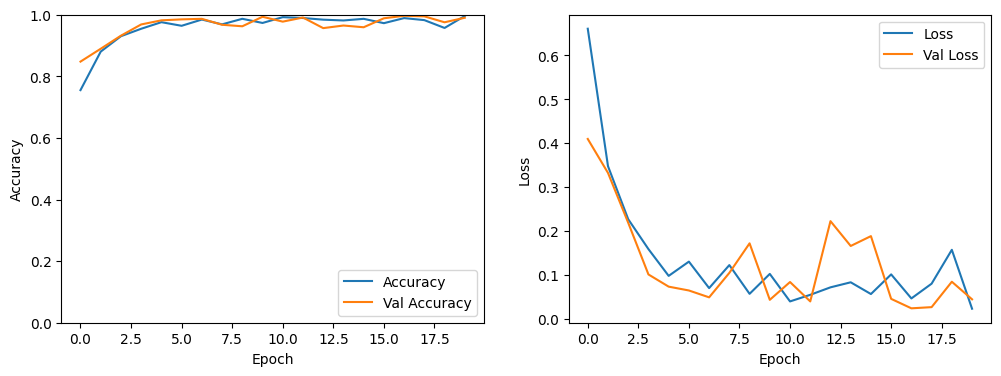

In [ ]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')

plt.show()

As it is a binary function, it is necessary to convert it to base 10, considering as values ​​0: there is no crisis, 1: there is a crisis, 2: prior to the crisis.

In [ ]:
def equivalente(c):
  if (c[0]==1. and c[1]==0. and c[2]==0.):
    return 0
  elif (c[0]==0. and c[1]==1. and c[2]==0.):
    return 1
  else:
    return 2

Evaluate accuracy with data that has been part of the training.

357/357 ━━━━━━━━━━━━━━━━━━━━ 8s 21ms/step
[2, 6, 8, 9, 12, 17, 20, 31, 39, 52, 54, 56, 63, 71, 82, 84, 87, 89, 91, 95, 99, 107, 111, 143, 149, 156, 160, 163, 176, 177, 178, 187, 191, 197, 201, 206, 233, 235, 245, 246, 248, 264, 265, 269, 276, 279, 282, 290, 293, 309, 323, 324, 330, 345, 359, 360, 364, 368, 369, 399, 401, 407, 409, 423, 424, 426, 430, 432, 444, 445, 457, 466, 472, 481, 483, 485, 494, 501, 512, 518, 521, 533, 538, 544, 545, 546, 553, 554, 570, 575, 580, 593, 595, 601, 608, 625, 628, 655, 663, 664, 671, 673, 688, 697, 700, 702, 709, 710, 718, 722, 735, 742, 757, 761, 774, 788, 790, 794, 799, 801, 810, 813, 820, 822, 823, 824, 836, 837, 845, 849, 852, 853, 860, 862, 867, 868, 878, 884, 887, 890, 894, 895, 901, 907, 916, 918, 922, 934, 941, 955, 967, 983, 988, 996, 999, 1002, 1008, 1015, 1017, 1019, 1024, 1030, 1031, 1039, 1045, 1047, 1053, 1060, 1067, 1074, 1095, 1104, 1107, 1112, 1125, 1129, 1137, 1139, 1147, 1148, 1156, 1160, 1170, 1180, 1189, 1192, 1199, 1201, 1215, 122

/tmp/ipython-input-33-3608456030.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([''] + labels)
/tmp/ipython-input-33-3608456030.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels([''] + labels)


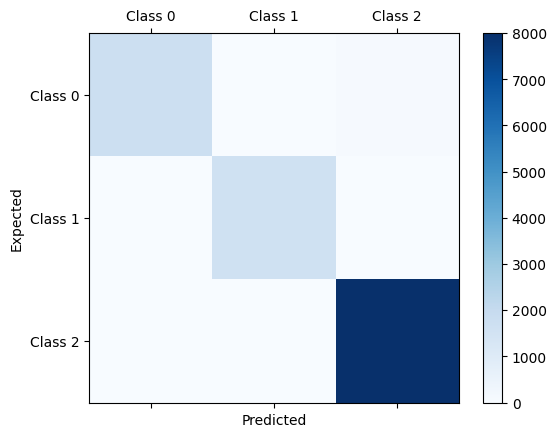

Sensibilidad:  1.0
Especificidad:  1.0
Exactitud =  1.0


In [ ]:
salida = model.predict(x_train2d).round()
y_simulado_lista = [equivalente(x) for x in salida]
segundos_1 = []
for seg in range(len(y_simulado_lista)):
  if y_simulado_lista[seg]==1:
    segundos_1.append(seg)
print(segundos_1)
plot_matrix_confission(y_train2d,y_simulado_lista)

Evaluate accuracy with data that has not been part of the training.

90/90 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step
[12, 20, 21, 22, 28, 40, 47, 48, 49, 54, 57, 58, 75, 82, 92, 101, 102, 109, 110, 114, 119, 132, 135, 145, 158, 160, 170, 171, 176, 179, 196, 200, 204, 207, 209, 211, 216, 218, 220, 233, 251, 261, 270, 283, 285, 288, 294, 301, 315, 326, 329, 344, 356, 358, 359, 361, 362, 379, 381, 383, 386, 405, 412, 417, 418, 421, 424, 436, 441, 446, 456, 457, 459, 463, 470, 474, 482, 485, 486, 487, 498, 499, 516, 517, 519, 526, 527, 571, 593, 596, 601, 614, 616, 620, 621, 622, 626, 627, 648, 655, 659, 661, 668, 671, 678, 680, 697, 699, 709, 734, 739, 740, 745, 749, 755, 761, 767, 768, 770, 785, 787, 797, 800, 802, 804, 815, 816, 824, 833, 834, 846, 851, 855, 859, 864, 880, 891, 892, 893, 924, 931, 932, 949, 952, 968, 989, 995, 998, 1011, 1013, 1017, 1023, 1030, 1037, 1038, 1065, 1074, 1079, 1089, 1091, 1097, 1099, 1107, 1120, 1139, 1140, 1147, 1162, 1170, 1172, 1180, 1184, 1190, 1212, 1218, 1220, 1228, 1231, 1236, 1261, 1262, 1265, 1271, 1276, 1290, 1291, 1299, 

/tmp/ipython-input-33-3608456030.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([''] + labels)
/tmp/ipython-input-33-3608456030.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels([''] + labels)


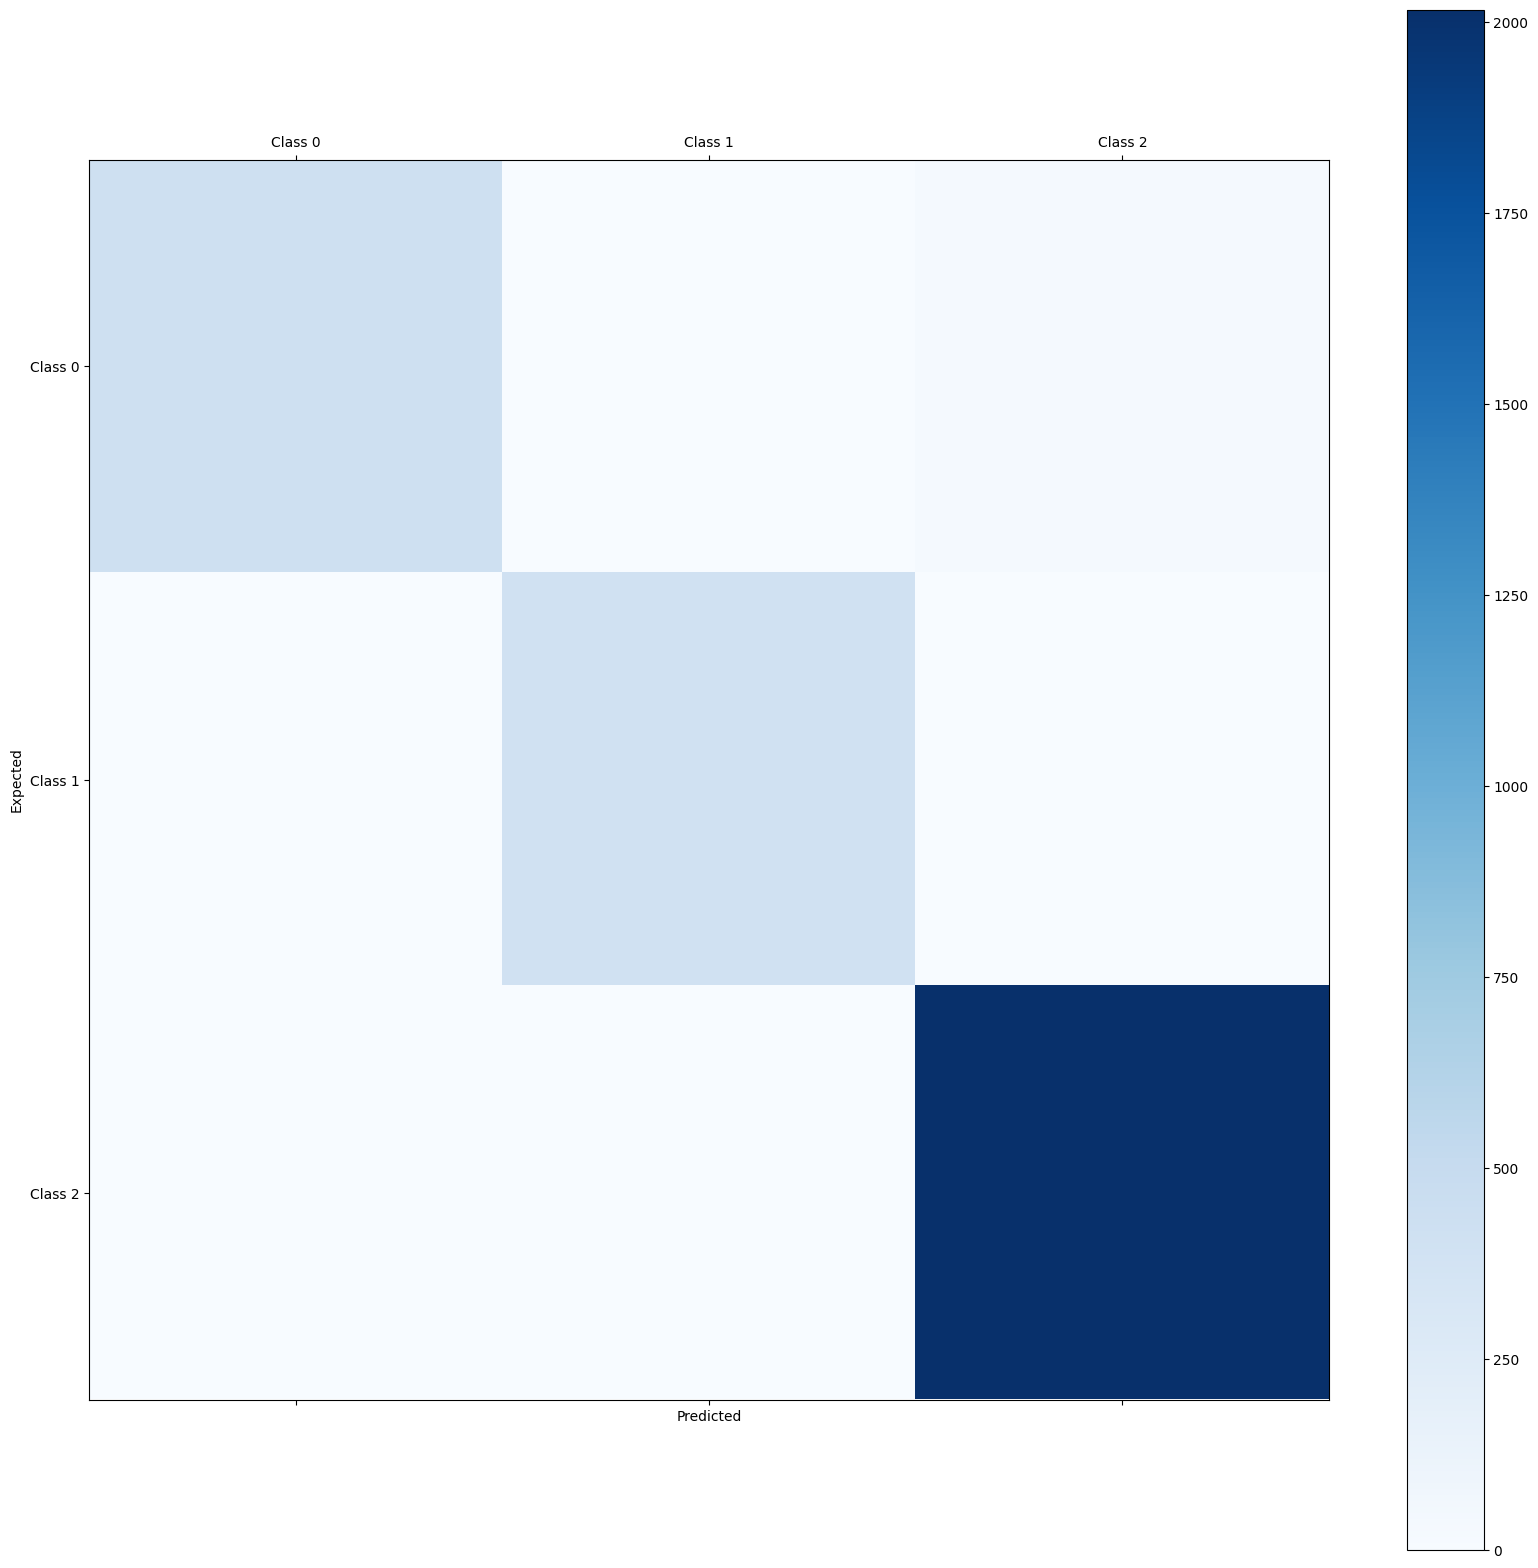

Sensibilidad:  1.0
Especificidad:  1.0
Exactitud =  1.0


In [ ]:
salida = model.predict(x_test2d).round()
y_simulado_lista = []
unos = []
for s,x in enumerate(salida):
  y_simulado_lista.append(equivalente(x))
  if (equivalente(x)==1):
    unos.append(s)
print(unos)
plot_matrix_confission(y_test2d,y_simulado_lista)

Evaluating accuracy with data from another data source is therefore a new evaluation.

50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step
[409, 593]
Matriz de Confusión - DATOS ORIGINALES:
 [[1481    0   89]
 [   1    2    0]
 [  15    0    0]]
Métricas de Matriz de Confusión - DATOS ORIGINALES:
               precision    recall  f1-score   support

           0       0.99      0.94      0.97      1570
           1       1.00      0.67      0.80         3
           2       0.00      0.00      0.00        15

    accuracy                           0.93      1588
   macro avg       0.66      0.54      0.59      1588
weighted avg       0.98      0.93      0.96      1588



/tmp/ipython-input-33-3608456030.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([''] + labels)
/tmp/ipython-input-33-3608456030.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels([''] + labels)


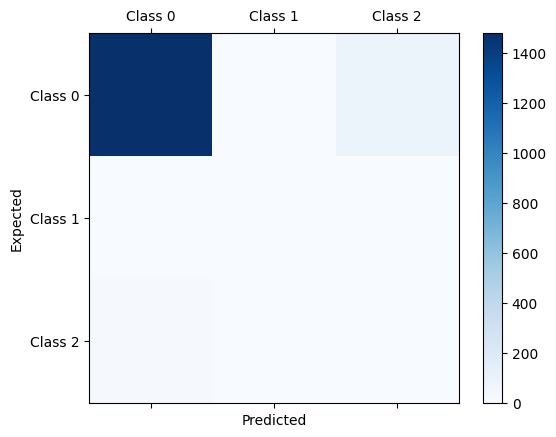

Sensibilidad:  0.9993252361673415
Especificidad:  1.0
Exactitud =  0.9993261455525606


In [ ]:
salida = model.predict(x2_test2d).round()
y_simulado_lista = []
unos = []
for s,x in enumerate(salida):
  y_simulado_lista.append(equivalente(x))
  if (equivalente(x)==1):
    unos.append(s)
print(unos)
plot_matrix_confission(y2_test2d,y_simulado_lista)

Showing the seconds where absence seizures have been found

# Net Neural SOM

In [ ]:
!pip install minisom

  Preparing metadata (setup.py) ... done
  Created wheel for minisom: filename=MiniSom-2.3.5-py3-none-any.whl size=12031 sha256=77d23eefa6d7be2cb48f66443541d280cadcfcd4ab1c50e302b19616e005ba67
  Stored in directory: /root/.cache/pip/wheels/19/db/95/5e53bc2b88a328217fdf9f2886cafbe86b0df274f4b601f572
Successfully built minisom


Passing the input data from two-dimensional to vector, so that it can be applied as input patterns to the AI-based model

In [ ]:
# from trained
x_train1d = []
for i in range(x_train2d.shape[0]):
  x_train1d.append(x_train2d[i,:,:].reshape(-1))
x_train1d = np.array(x_train1d)
# from testing
x_test1d = []
for i in range(x_test2d.shape[0]):
  x_test1d.append(x_test2d[i,:,:].reshape(-1))
x_test1d = np.array(x_test1d)
# from testing of other file
x2_test1d = []
for i in range(x2_test2d.shape[0]):
  x2_test1d.append(x2_test2d[i,:,:].reshape(-1))
x2_test1d = np.array(x2_test1d)

Searching for the competitive matrix dimension that gives the best results.

[0.99894774 1.         1.        ]


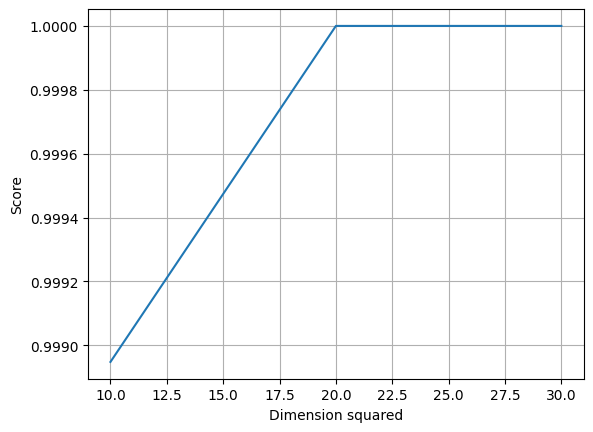

maximo dimension squared is: 1.0


In [ ]:
from minisom import MiniSom
max_iter = 4000
alpha_max = 0.5
dimension=np.arange(10,40,10, dtype=int)
resultados = np.zeros((max(dimension.shape)))
for j,d in enumerate(dimension):
  som = MiniSom(x=d, y=d, input_len=x_train1d.shape[1], sigma=1.0, learning_rate=alpha_max,activation_distance='euclidean',
                topology='hexagonal', neighborhood_function='gaussian')
  som.random_weights_init(x_train1d)
  som.train_random(data=x_train1d, num_iteration=max_iter)
  M = np.zeros([d, d], np.float32)
  for i, x in enumerate(x_train1d):
    M[som.winner(x)] = y_train2d[i]

  y_simulado_lista = [M[som.winner(x)] for x in x_test1d]
  precision = 0.0
  for i,s in enumerate(y_simulado_lista):
    if s==y_test2d[i]:
      precision+=1
  resultados[j]= precision/len(y_simulado_lista)

print(resultados)
plt.plot(dimension ,resultados[:])
plt.xlabel('Dimension squared')
plt.ylabel('Score')
plt.grid(True)
plt.show()
print("maximo dimension squared is:",max(resultados))

Training the model with the best competitive matrix dimension and Evaluate accuracy with data that has been part of the training.

Matriz de Confusión - DATOS ORIGINALES:
 [[ 440    0    0]
 [   0  394    0]
 [   0    0 2017]]
Métricas de Matriz de Confusión - DATOS ORIGINALES:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       440
           1       1.00      1.00      1.00       394
           2       1.00      1.00      1.00      2017

    accuracy                           1.00      2851
   macro avg       1.00      1.00      1.00      2851
weighted avg       1.00      1.00      1.00      2851



/tmp/ipython-input-33-3608456030.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([''] + labels)
/tmp/ipython-input-33-3608456030.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels([''] + labels)


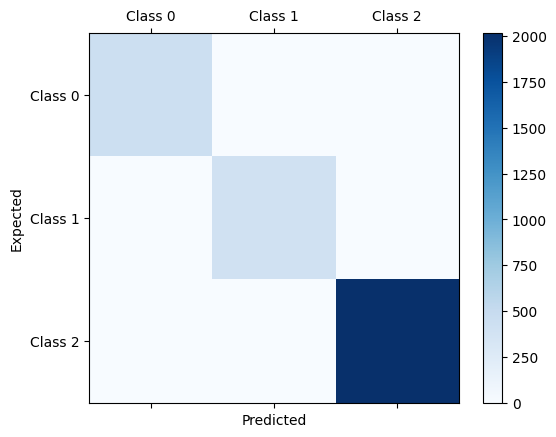

Sensibilidad:  1.0
Especificidad:  1.0
Exactitud =  1.0


In [ ]:
max_iter = 5000
alpha_max = 0.5
d = dimension[np.min(np.where(resultados == np.argmax(resultados) if np.argmax(resultados).size==1 else resultados[0]))]
som = MiniSom(x=d, y=d, input_len=x_train1d.shape[1], sigma=1.0, learning_rate=alpha_max,activation_distance='euclidean',
                topology='hexagonal', neighborhood_function='gaussian')
som.random_weights_init(x_train1d)
som.train_random(data=x_train1d, num_iteration=max_iter)
M = np.zeros([d, d], np.float32)
for i, x in enumerate(x_train1d):
  M[som.winner(x)] = y_train2d[i]

y_simulado_lista = [M[som.winner(x)] for x in x_test1d]
plot_matrix_confission(y_test2d,y_simulado_lista)

Showing the clustering of the index matrix.

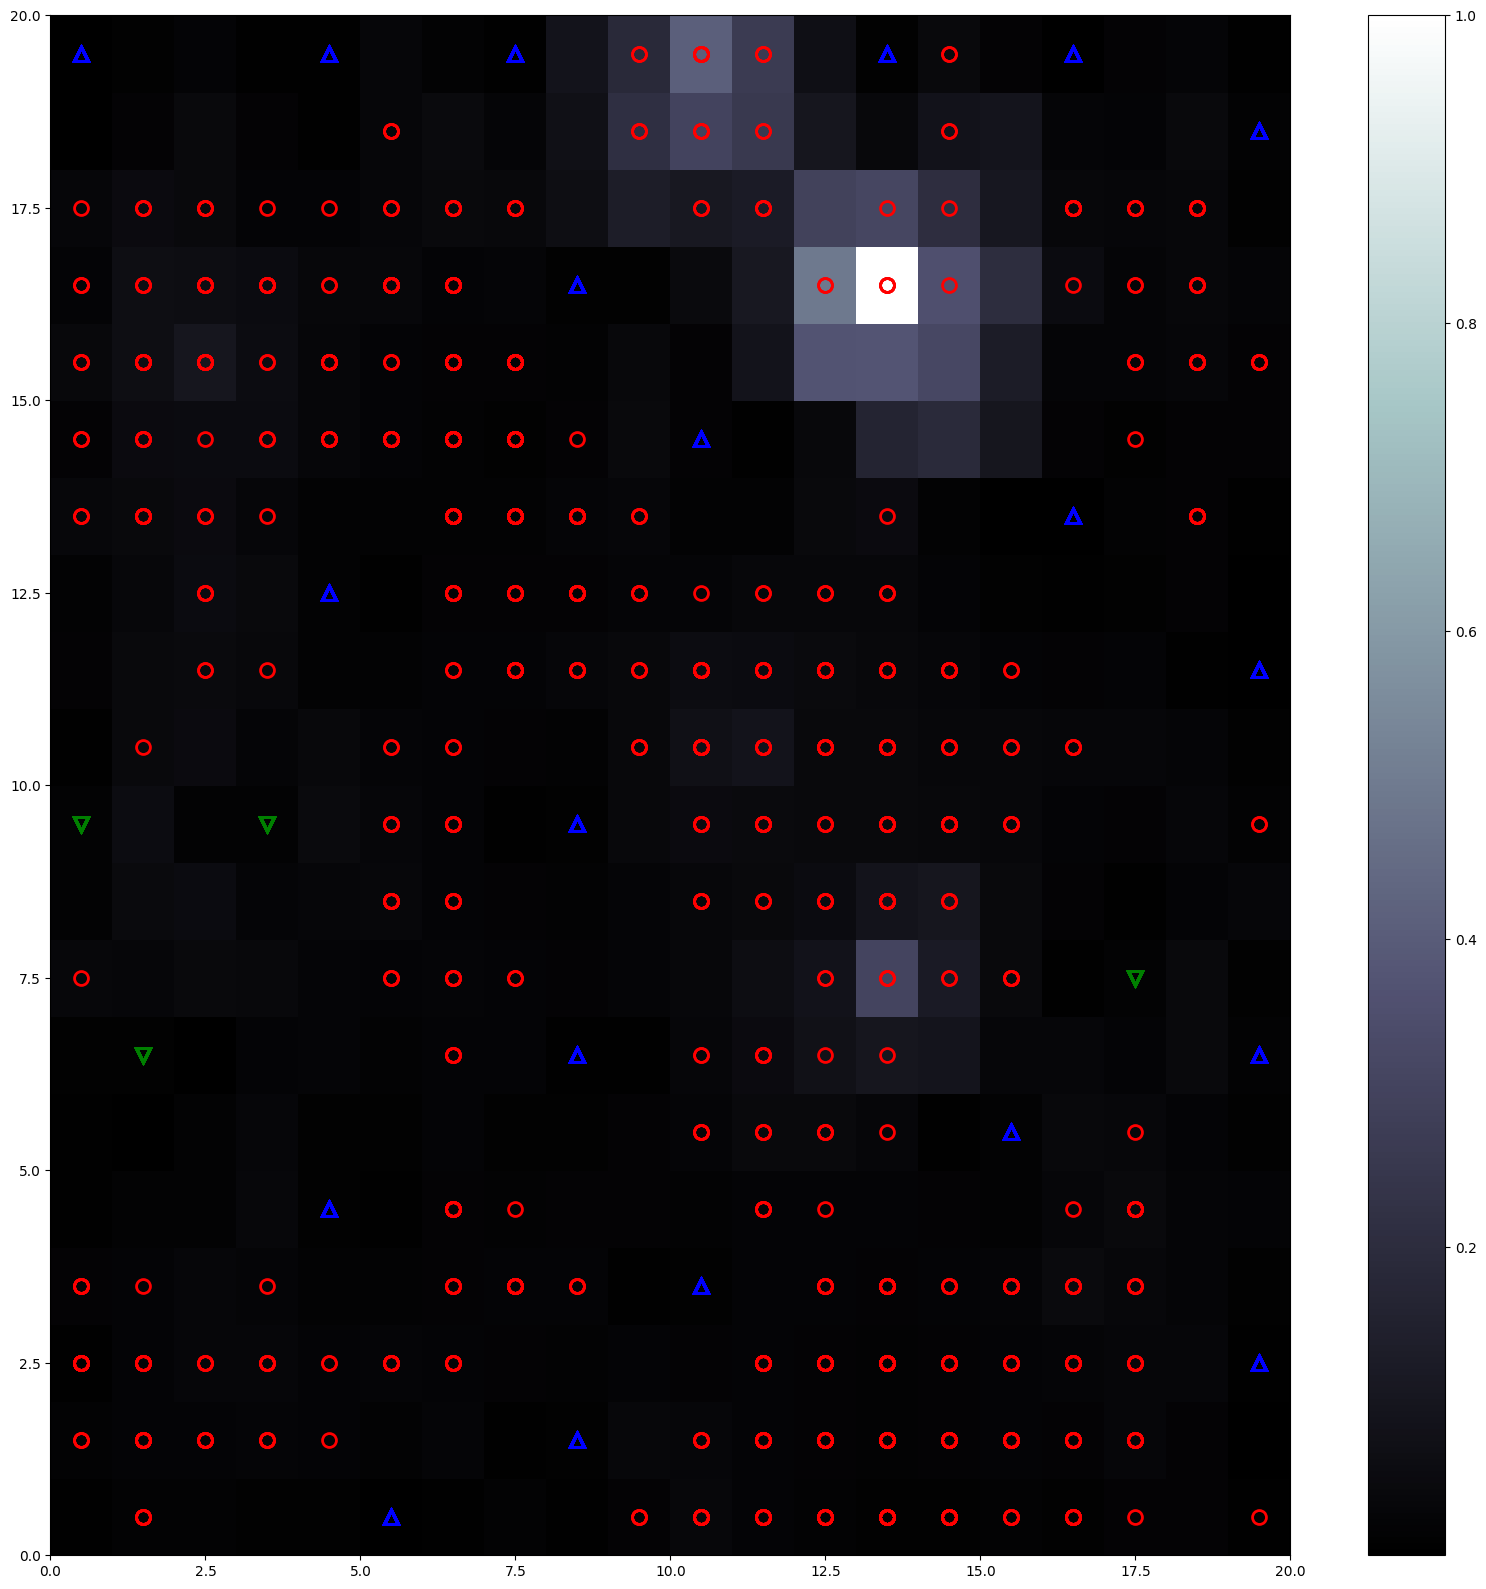

In [ ]:
from pylab import bone, pcolor, colorbar, plot, show
from pylab import rcParams
rcParams['figure.figsize'] = d, d
bone()
pcolor(som.distance_map().T)
colorbar()

# Asignar etiquetas a las celdas de la red SOM
M = np.zeros([d, d], np.float32)
markers = ['o', 'v', '^']
colors = ['r', 'g', 'b']
for i, x in enumerate(x_train1d):
    w = som.winner(x)
    plot(w[0] + 0.5, w[1] + 0.5, markers[y_train2d[i]],
         markeredgecolor=colors[y_train2d[i]],
         markerfacecolor='None', markersize=10, markeredgewidth=2)
    M[w[0], w[1]] = y_train2d[i]
show()

Evaluate accuracy with data that has not been part of the training.

Matriz de Confusión - DATOS ORIGINALES:
 [[ 440    0    0]
 [   0  394    0]
 [   0    0 2017]]
Métricas de Matriz de Confusión - DATOS ORIGINALES:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       440
           1       1.00      1.00      1.00       394
           2       1.00      1.00      1.00      2017

    accuracy                           1.00      2851
   macro avg       1.00      1.00      1.00      2851
weighted avg       1.00      1.00      1.00      2851



/tmp/ipython-input-33-3608456030.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([''] + labels)
/tmp/ipython-input-33-3608456030.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels([''] + labels)


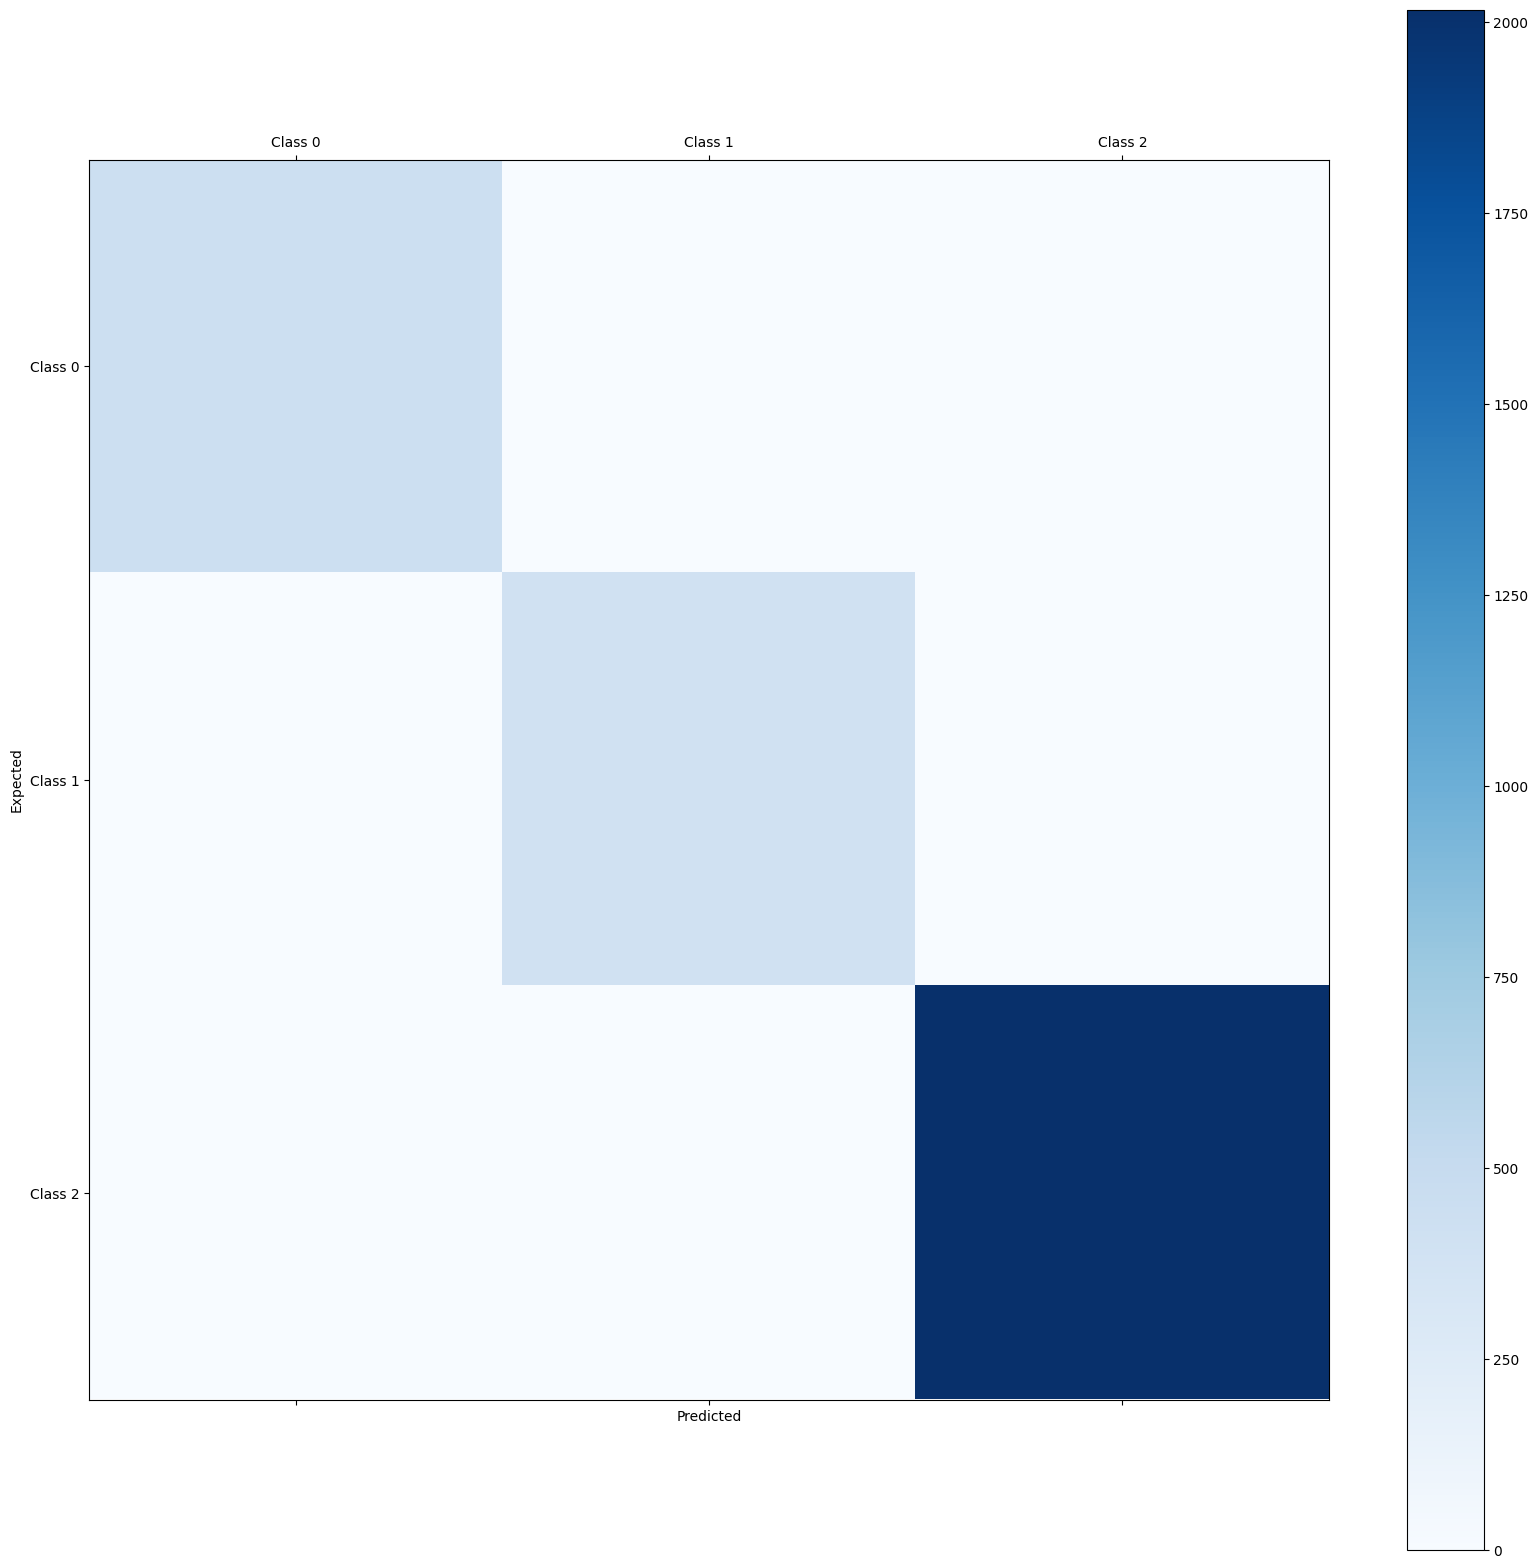

Sensibilidad:  1.0
Especificidad:  1.0
Exactitud =  1.0


In [ ]:
y_simulado_lista = [M[som.winner(x)] for x in x_test1d]
plot_matrix_confission(y_test2d,y_simulado_lista)

Evaluating accuracy with data from another data source is therefore a new evaluation.

[]
Matriz de Confusión - DATOS ORIGINALES:
 [[1568    0    2]
 [   3    0    0]
 [  15    0    0]]
Métricas de Matriz de Confusión - DATOS ORIGINALES:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99      1570
           1       0.00      0.00      0.00         3
           2       0.00      0.00      0.00        15

    accuracy                           0.99      1588
   macro avg       0.33      0.33      0.33      1588
weighted avg       0.98      0.99      0.98      1588



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/tmp/ipython-input-33-3608456030.py:13: UserWarni

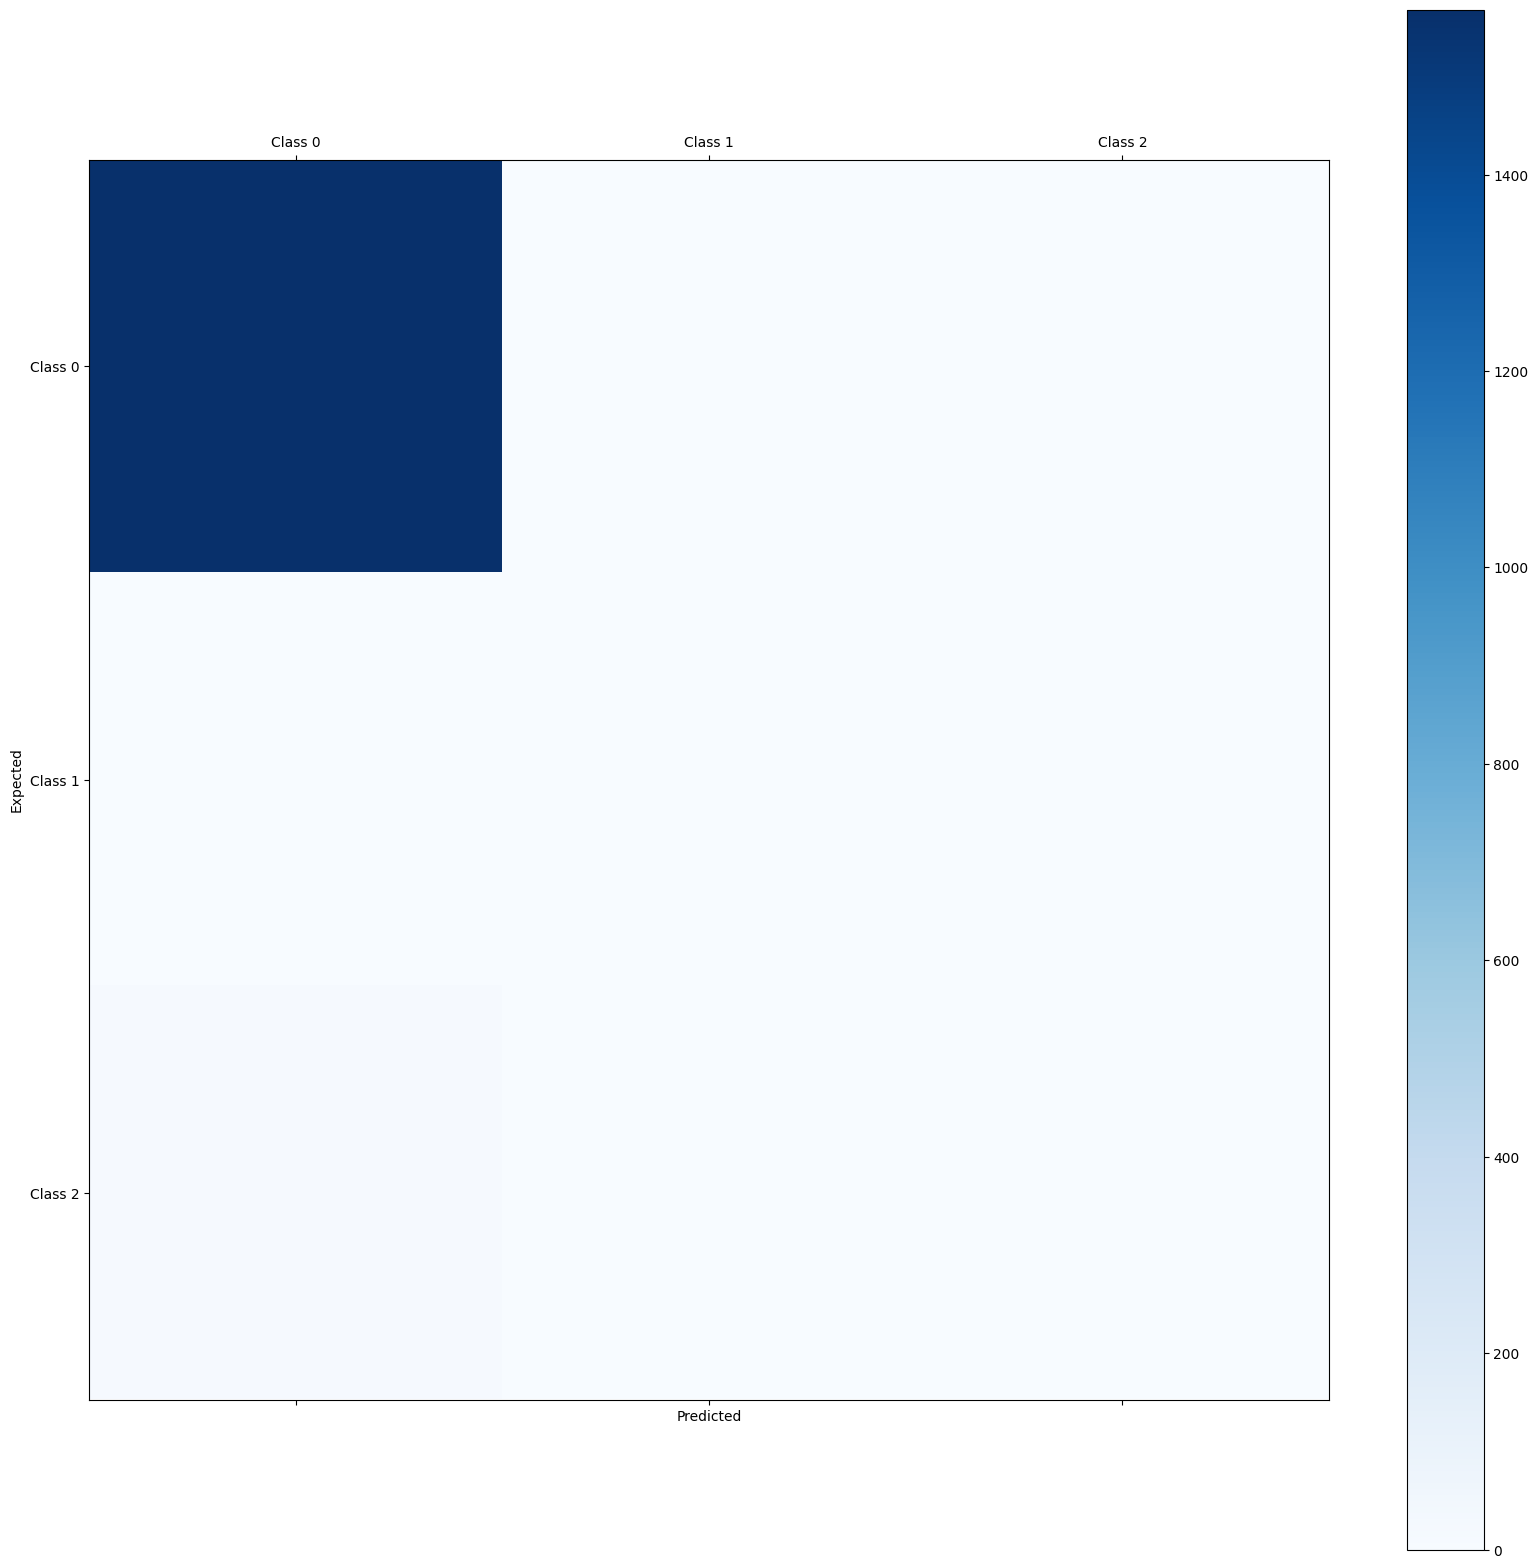

Sensibilidad:  0.9980903882877148
Especificidad:  nan
Exactitud =  0.9980903882877148


/tmp/ipython-input-33-3608456030.py:28: RuntimeWarning: invalid value encountered in scalar divide
  especificidad = VN/(VN+FP)


In [ ]:
y_simulado_lista = []
unos = []
for s,x in enumerate(x2_test1d):
  w = som.winner(x)
  y_simulado_lista.append(M[w])
  if M[w]==1:
    unos.append(s)
print(unos)
plot_matrix_confission(y2_test2d,y_simulado_lista)

Matrix of index to neural SOM

In [ ]:
print(M)

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 2.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 2. 0. 0. 0. 0. 0. 0. 0. 2. 0. 0. 0. 0. 0. 0. 2.]
 [2. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 2.]
 [0. 2. 0. 0. 0. 0. 2. 0. 0. 2. 0. 0. 0. 0. 0. 0. 2. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 2. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 2. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 2.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 2. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.